**importing dependncies**

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**data collection and processing**

In [118]:
car_data = pd.read_csv('./car_data.csv')

In [119]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [120]:
car_data.shape

(4340, 8)

In [121]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


**checking the distribution of categorical data**

In [122]:
print(car_data.fuel.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [123]:
print(car_data.seller_type.value_counts())

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [124]:
print(car_data.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [125]:
print(car_data.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


**encoding the categorical data**

In [126]:
car_data.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)
car_data.replace({'seller_type':{'Dealer':0, 'Individual':1, 'Trustmark Dealer':2}},inplace=True)
car_data.replace({'transmission':{'Manual':0, 'Automatic':1}},inplace=True)
car_data.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}},inplace=True)

/tmp/ipykernel_1234/1507233383.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)
/tmp/ipykernel_1234/1507233383.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'seller_type':{'Dealer':0, 'Individual':1, 'Trustmark Dealer':2}},inplace=True)
/tmp/ipykernel_1234/1507233383.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explic

In [127]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


**splitting the data into training and text data**

In [128]:
X = car_data.drop(['name','selling_price'],axis=1)
Y = car_data['selling_price']

In [129]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

**training using Linear Regression Model**

In [130]:
lin_reg = LinearRegression()

In [131]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

**evaluation**

In [132]:
test_data_prediction = lin_reg.predict(X_test)

In [133]:
R2_test = metrics.r2_score(Y_test,test_data_prediction)

In [134]:
print(f"R square error: {R2_test}")

R square error: 0.4772019874558854


**visualization**

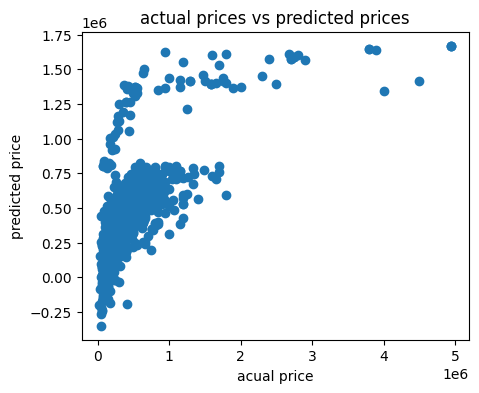

In [135]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('acual price')
plt.ylabel('predicted price')
plt.title('actual prices vs predicted prices')
plt.show()

**training using Lasso Regression Model**

In [136]:
lss_reg = Lasso()

In [137]:
lss_reg.fit(X_train,Y_train)

Lasso()

**evaluation**

In [138]:
test_data_predic = lss_reg.predict(X_test)

In [139]:
r2_test = metrics.r2_score(Y_test,test_data_predic)

In [140]:
print(f"R square error: {r2_test}")

R square error: 0.47720154921765945


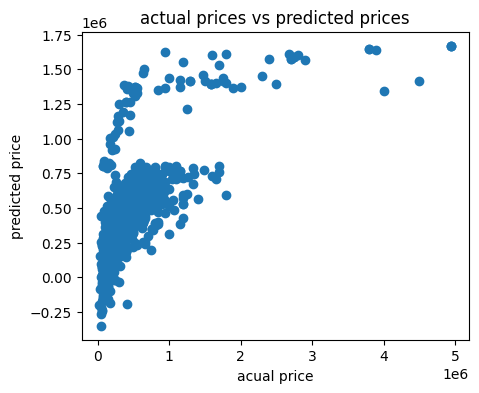

In [141]:
plt.figure(figsize=(5,4))
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('acual price')
plt.ylabel('predicted price')
plt.title('actual prices vs predicted prices')
plt.show()